In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X=pd.read_csv('train.csv',encoding = "ISO-8859-1")
X.head(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [3]:
df_address=pd.read_csv('addresses.csv')
print(df_address.shape)
df_address.head(5)

(311307, 2)


,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [4]:
df_latlons=pd.read_csv('latlons.csv')
print(df_latlons.shape)
df_latlons.dropna(inplace=True)
print(df_latlons.isnull().sum())
df_latlons.head(5)

(121769, 3)
address    0
lat        0
lon        0
dtype: int64


,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [5]:
location=df_address.merge(df_latlons, how='inner',on='address')
print(location.shape)
print(location.isnull().sum())
location.head(5)

(311299, 4)
ticket_id    0
address      0
lat          0
lon          0
dtype: int64


,ticket_id,address,lat,lon
0,22056,"2900 tyler, Detroit MI",42.390729,-83.124268
1,77242,"2900 tyler, Detroit MI",42.390729,-83.124268
2,77243,"2900 tyler, Detroit MI",42.390729,-83.124268
3,103945,"2900 tyler, Detroit MI",42.390729,-83.124268
4,138219,"2900 tyler, Detroit MI",42.390729,-83.124268


In [6]:
X=X.merge(location,how='inner',on='ticket_id')
print(X.shape)
X.head()

(250303, 37)


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"1449 longfellow, Detroit MI",42.380516,-83.096069
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"1441 longfellow, Detroit MI",42.380570,-83.095919
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"2449 churchill, Detroit MI",42.145257,-83.208233


In [7]:
X.set_index('ticket_id',inplace=True)
print(X.columns)

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')


In [8]:
X.drop([
            'balance_due',
            'collection_status',
            'compliance_detail',
            'payment_amount',
            'payment_date',
            'payment_status',
            'violator_name', 'zip_code', 'country', 'city',
            'inspector_name', 'violation_street_number', 'violation_street_name',
            'violation_zip_code', 'violation_description',
            'mailing_address_str_number', 'mailing_address_str_name',
            'non_us_str_code', 'agency_name', 'state', 'disposition',
            'ticket_issued_date', 'hearing_date', 'grafitti_status', 'violation_code','address'
        ],axis=1,inplace=True)
X.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,lat,lon
ticket_id,,,,,,,,,,
22056,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.390729,-83.124268
27586,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0,42.326937,-83.135118
22062,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.380516,-83.096069
22084,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.380570,-83.095919
22093,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.145257,-83.208233


In [9]:
X.dropna(inplace=True)

In [10]:
X.isnull().sum()

fine_amount        0
admin_fee          0
state_fee          0
late_fee           0
discount_amount    0
clean_up_cost      0
judgment_amount    0
compliance         0
lat                0
lon                0
dtype: int64

In [11]:
X_F=X.drop('compliance', axis=1)
y_F =X.compliance

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_F,y_F, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

norma= StandardScaler()

X_train_N = norma.fit_transform(X_train)
X_test_N= norma.transform(X_test)

In [14]:
y_train_ar=y_train.to_numpy()
y_test_ar=y_test.to_numpy()

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch

In [16]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(2, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [17]:
tuner = RandomSearch(
    build_model,
    objective= 'val_acc',
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="Blight ticket violation",
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [19]:
tuner.search(X_train_N, y_train_ar, epochs=30, validation_data=(X_test_N, y_test_ar))

Trial 3 Complete [00h 28m 26s]
val_acc: 0.9329122304916382

Best val_acc So Far: 0.9329747557640076
Total elapsed time: 00h 56m 47s
INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.results_summary()

Results summary
Results in my_dir\Blight ticket violation
Showing 10 best trials
Objective(name='val_acc', direction='max')
Trial summary
Hyperparameters:
num_layers: 12
units_0: 416
units_1: 320
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 0.9329747557640076
Trial summary
Hyperparameters:
num_layers: 12
units_0: 224
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 448
units_4: 480
units_5: 192
units_6: 352
units_7: 384
units_8: 160
units_9: 416
units_10: 192
units_11: 64
Score: 0.9329122304916382
Trial summary
Hyperparameters:
num_layers: 12
units_0: 64
units_1: 192
learning_rate: 0.01
units_2: 64
units_3: 384
units_4: 64
units_5: 224
units_6: 256
units_7: 32
units_8: 288
units_9: 160
units_10: 288
units_11: 224
Score: 0.9263697862625122


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [23]:
model=Sequential ([
    Dense(units=416, activation='relu'),
    Dense(units=320, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
model.fit(X_train_N, y_train_ar, validation_split=0.1, batch_size=100,
         epochs=30, shuffle=True, verbose=2)

Train on 107917 samples, validate on 11991 samples
Epoch 1/30
107917/107917 - 4s - loss: 0.2720 - acc: 0.9296 - val_loss: 0.2116 - val_acc: 0.9362
Epoch 2/30
107917/107917 - 3s - loss: 0.2155 - acc: 0.9341 - val_loss: 0.2131 - val_acc: 0.9372
Epoch 3/30
107917/107917 - 3s - loss: 0.2145 - acc: 0.9344 - val_loss: 0.2122 - val_acc: 0.9365
Epoch 4/30
107917/107917 - 4s - loss: 0.2139 - acc: 0.9345 - val_loss: 0.2108 - val_acc: 0.9369
Epoch 5/30
107917/107917 - 5s - loss: 0.2134 - acc: 0.9344 - val_loss: 0.2102 - val_acc: 0.9370
Epoch 6/30
107917/107917 - 5s - loss: 0.2128 - acc: 0.9344 - val_loss: 0.2106 - val_acc: 0.9369
Epoch 7/30
107917/107917 - 5s - loss: 0.2127 - acc: 0.9345 - val_loss: 0.2112 - val_acc: 0.9368
Epoch 8/30
107917/107917 - 5s - loss: 0.2123 - acc: 0.9344 - val_loss: 0.2097 - val_acc: 0.9367
Epoch 9/30
107917/107917 - 4s - loss: 0.2122 - acc: 0.9345 - val_loss: 0.2088 - val_acc: 0.9371
Epoch 10/30
107917/107917 - 4s - loss: 0.2118 - acc: 0.9345 - val_loss: 0.2097 - val_

In [26]:
pre=model.predict(X_test_N, batch_size=100, verbose=0)

In [27]:
rounded_pre=np.argmax(pre, axis=1)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_ar, rounded_pre)

In [29]:
cm

array([[37010,    17],
       [ 2675,   268]], dtype=int64)

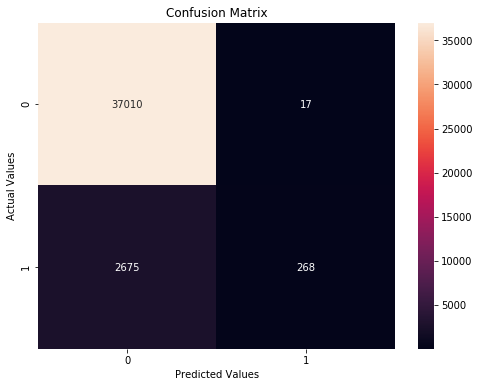

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');